In [9]:
__author__ = "730394836"

In [10]:
%reload_ext autoreload
%autoreload 2

# Hypothesis: There are more students who are declared computer science majors and taking COMP 110, than in any other major declaration
### To begin my analysis, I must read in the csv file and then convert it into a column-oriented table. I will reveal the new column oriented table's first 4 rows using the tablulate function.

In [11]:
from data_utils import read_csv_rows, columnar, head
from tabulate import tabulate

rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(rows)
tabulate(head(columns, 4), columns.keys(), "html")

row_number,year,unc_status,comp_major,primary_major,data_science,prereqs,prior_exp,AP_Principles,AP_A,other_comp,prior_time,languages,section,in_person_classes,hours_online_social,hours_online_work,lesson_time,sync_perf,all_sync,own_notes,own_examples,oh_visits,ls_effective,lsqs_effective,programming_effective,qz_effective,oh_effective,tutoring_effective,kaki_effective,pace,difficulty,understanding,interesting,valuable,would_recommend
0,23,Returning UNC Student,No,Advertising and Public Relations,No,"MATH 129P, MATH 130",None to less than one month!,,,,,,In-Person,,3 to 5 hours,3 to 5 hours,5,2,2,4,2,2,7,6,6,5,5,,3,5,5,4,5,6,7
1,24,Returning UNC Student,No,Anthropology,No,"MATH 129P, MATH 231",None to less than one month!,,,,,,In-Person,,5 to 10 hours,5 to 10 hours,4,5,4,7,6,0,6,5,7,5,,,6,5,3,7,7,7,7
2,23,Returning UNC Student,No,Biology,No,"MATH 231, MATH 232, MATH 233, MATH 381",None to less than one month!,,,,,,Remote,Yes,3 to 5 hours,5 to 10 hours,2,1,1,7,6,0,7,7,7,7,,,,5,5,6,7,7,7
3,24,Returning UNC Student,No,Biology,No,"MATH 130, MATH 231",None to less than one month!,,,,,,,Yes,5 to 10 hours,5 to 10 hours,2,3,1,6,4,4,7,7,7,7,7,7,7,6,6,4,5,4,7


### Next, I will select the column that I need, which is the primary_major column.

In [12]:
from data_utils import select

majors: dict[str, list[str]] = select(columns, ["primary_major"])

### Next, I will count the number of of students in each major.

In [13]:
from data_utils import count

major_count: dict[str, int] = count(majors["primary_major"])
print(major_count)

{'Advertising and Public Relations': 1, 'Anthropology': 1, 'Biology': 59, 'Biostatistics': 6, 'Biostatistics ': 5, 'Business': 51, 'Chemistry': 5, 'Communications': 3, 'Computer Science': 119, 'Economics': 42, 'English': 3, 'Environmental Science': 14, 'Environmental Science ': 8, 'Exercise and Sports Science': 7, 'Geology': 1, 'Global Studies': 1, 'Health Policy and Management': 3, 'History': 3, 'Information Science': 14, 'Information science': 1, 'Information Science ': 4, 'Journalism': 6, 'Math': 7, 'Math ': 12, 'Neuroscience': 33, 'Neuroscience ': 15, 'Nursing': 2, 'Nutrition': 2, 'Peace, War, and Defense': 5, 'Physics': 4, 'Political Science': 5, 'Psychology': 38, 'Psychology ': 37, 'Public Health': 3, 'Public Policy': 4, 'Sociology': 1, 'Spanish': 1, 'Statistics': 8, 'Statistics ': 21, 'Undecided': 18}


### As you can see from the output above, there are some repeating majors that are counted as different due to a slight difference in characters. The following helper function will serve to combine the majors that are counted more than once and further organize the data.

In [14]:
from data_utils import corrected_values

corrected_count: dict[str, int] = corrected_values(major_count)
print(corrected_count)

{'Advertising and Public Relations': 1, 'Anthropology': 1, 'Biology': 59, 'Biostatistics': 11, 'Business': 51, 'Chemistry': 5, 'Communications': 3, 'Computer Science': 119, 'Economics': 42, 'English': 3, 'Environmental Science': 22, 'Exercise and Sports Science': 7, 'Geology': 1, 'Global Studies': 1, 'Health Policy and Management': 3, 'History': 3, 'Information Science': 19, 'Journalism': 6, 'Math': 19, 'Neuroscience': 48, 'Nursing': 2, 'Nutrition': 2, 'Peace, War, and Defense': 5, 'Physics': 4, 'Political Science': 5, 'Psychology': 75, 'Public Health': 3, 'Public Policy': 4, 'Sociology': 1, 'Spanish': 1, 'Statistics': 29, 'Undecided': 18}


### Now I will create a bar graph to represent the data.

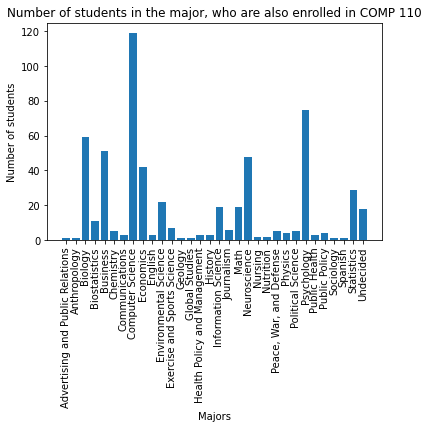

In [15]:
from matplotlib import pyplot as plt
x = corrected_count.keys()
h = corrected_count.values()
plt.bar(x, h)
plt.xlabel("Majors")
plt.ylabel("Number of students")
plt.title("Number of students in the major, who are also enrolled in COMP 110")
plt.tick_params(axis='x', labelrotation= 90)
plt.show()

### Looking at the graph, we can see that out of the students who are enrolled in COMP 110, the most declared major is computer science. 

## Now, I will explore further and see, out of this sample, the number of students intending to major in a BA vs a BS degree in computer science.
### I will use the select and count functions again to create another graph

{'Yes - BS': 88, 'Yes - BA': 48}


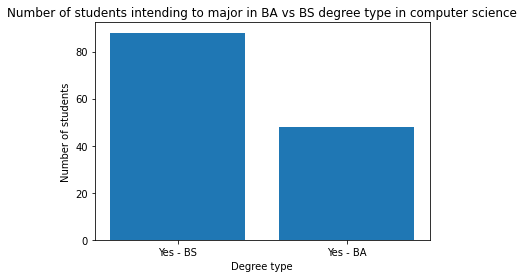

In [16]:
degree_type: dict[str, list[str]] = select(columns, ["comp_major"])
degree_type_count: dict[str, int] = count(degree_type["comp_major"])
degree_type_count.pop("No")
degree_type_count.pop("Yes - Minor")
print(degree_type_count)

x = degree_type_count.keys()
h = degree_type_count.values()
plt.bar(x, h)
plt.xlabel("Degree type")
plt.ylabel("Number of students")
plt.title("Number of students intending to major in BA vs BS degree type in computer science")
plt.tick_params(axis='x', labelrotation= 0)
plt.show()

# Conclusion
### In conclusion my hypothesis that there are more students who are declared computer science majors and taking COMP 110, than in any other major declaration, was correct. From the survey taken, computer science had the largest number of declared students, which was 119. I was also able to explore further and determine that out of the respondants declaring the computer science major, 88 of them are pursuing a bachelor of science degree, while 48 of them are pursuing a bachelor of arts degree.